# Traduction en français du notebook *01* du cours ***Deep Learning*** d'Alfredo Canziani, professeur assistant à la *New York University*  : 
https://github.com/Atcold/pytorch-Deep-Learning/blob/master/01-tensor_tutorial.ipynb


# Qu'est-ce que PyTorch ?

Il s'agit d'un package de calcul scientifique basé sur Python et destiné à deux types de public :

- La librairie tensorielle qui utilise la puissance des GPU
- Une plateforme pour la recherche en apprentissage profond qui offre un maximum de flexibilité et de rapidité



## Importer la librairie

In [1]:
import torch  # <Ctrl> ou <Shift> + <Entrée>

## Obtenir de l'aide dans Jupyter

In [ ]:
torch.sq  # <Tab>

In [ ]:
# Qu'en est-il de tous les "tenseurs" ?
# Appuyez sur <ech> pour sortir de l'aide
torch.*Tensor?

In [ ]:
torch.nn.Module()  # <Shift>+<Tab>

In [ ]:
# Annotez vos fonctions / cours !
torch.nn.Module?

In [ ]:
torch.nn.Module??

## Bash: magic!

In [ ]:
# Pour lister tous les fichiers dans le répertoire courant
!ls -lh

In [ ]:
%%bash
# Lister tous les fichiers mais avec des sorties plus propres pour la lisibilité
for f in $(ls *.*); do
    echo $(wc -l $f)
done

In [ ]:
# Pour obtenir une aide générale
%magic

## Types de données en Python

Python possède de nombreux types de données. Voici les plus importants :

 - Les **booléens** (*booleans*) sont soit `True` soit `False`.
 - Les **nombres** (*numbers*) peuvent être des entiers (1 et 2), des flottants (1.1 et 1.2), des fractions (1/2 et 2/3), ou même des nombres complexes.
 - **Les chaînes de caractères** (*strings*) sont des séquences de caractères Unicode, par exemple un document html.
 - Les **listes** (*list*) sont des séquences ordonnées de valeurs.
 - Les **tuples** (*tuples*) sont des séquences de valeurs ordonnées et immuables.
 - Les **ensembles** (*set*) sont des sacs de valeurs non ordonnées.
 - **Les dictionnaires** (*dictionaries*) sont des sacs non ordonnés de paires clés/valeurs.
 
Voir [ici](http://www.diveintopython3.net/native-datatypes.html) pour une vue d'ensemble complète.

### Plus de ressources (en anglais)

 1. Brève présentation de Python [ici](https://learnxinyminutes.com/docs/python3/).
 2. Tutoriel Python complet [ici](https://docs.python.org/3/tutorial/).
 3. Un tour d'horizon de Python [ici](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [ici](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!

In [3]:
# Pour générer un tenseur de taille 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [4]:
# Pour obtenir la taille du tenseur
t.size()

torch.Size([2, 3, 4])

In [5]:
# t.size() est un tuple classique =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [6]:
# Pour afficher l'espace dimensionnel et les sous-dimensions
print(f'points dans un espace de dimension {t.numel()}')
print(f'organisés en {t.dim()} sous-dimensions')

points dans un espace de dimension 24
organisés en 3 sous-dimensions


In [7]:
t

tensor([[[1.0102e-38, 1.0561e-38, 9.0919e-39, 9.2755e-39],
         [2.9389e-39, 1.2960e-19, 2.9389e-39, 8.9082e-39],
         [2.9389e-39, 1.0745e-38, 2.1490e-38, 1.0469e-38]],

        [[2.9389e-39, 9.0919e-39, 9.2755e-39, 2.1398e-38],
         [2.9389e-39, 1.0010e-38, 2.1398e-38, 9.6429e-39],
         [1.0653e-38, 1.0010e-38, 1.0102e-38, 1.6255e-43]]])

In [8]:
# Attention au soulignement !
# Toute opération qui fait muter un tenseur en place est post-fixée avec un _.
# Par exemple : x.copy_(y), x.t_(), x.random_(n) changera x.
t.random_(10)

tensor([[[6., 3., 7., 4.],
         [4., 8., 2., 9.],
         [0., 2., 9., 2.]],

        [[1., 3., 4., 4.],
         [2., 1., 8., 8.],
         [1., 7., 4., 7.]]])

In [9]:
t

tensor([[[6., 3., 7., 4.],
         [4., 8., 2., 9.],
         [0., 2., 9., 2.]],

        [[1., 3., 4., 4.],
         [2., 1., 8., 8.],
         [1., 7., 4., 7.]]])

In [10]:
# Ce qui suit permet de redimensionner le tenseur de façon permanente 
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[6., 3., 7., 4., 4., 8., 2., 9.],
        [0., 2., 9., 2., 1., 3., 4., 4.],
        [2., 1., 8., 8., 1., 7., 4., 7.]])

In [11]:
# Comme vous pouvez le voir, zero_ remplace r par des 0, qui était à l'origine rempli d'entiers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [13]:
# C'est important
s = r.clone()

In [14]:
# Remplissage par des 1
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
# Parce que nous avons cloné r, même si nous avons fait une nouvelle opération, cela n'affecte pas r

## Vecteurs (Tenseurs 1D)

In [15]:
# Pour créer un tenseur 1D des entiers 1 à 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [16]:
# Pour afficher le nombre de dimensions (1D) et la taille du tenseur
print(f'dim: {v.dim()}, taille: {v.size()[0]}')

dim: 1, taille: 4


In [17]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [18]:
# Multiplication par éléments
v * w

tensor([1., 0., 6., 0.])

In [19]:
# Produit scalaire : 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [20]:
# Remplacement de nombre aléatoire de 0 à 10
x = torch.Tensor(5).random_(10)
x

tensor([7., 4., 9., 1., 1.])

In [21]:
print(f'premier: {x[0]}, dernier: {x[-1]}')

premier: 7.0, dernier: 1.0


In [22]:
# Extrait du sous-tenseur [de:à]
x[1:2 + 1]

tensor([4., 9.])

In [23]:
v

tensor([1., 2., 3., 4.])

In [24]:
# Pour créer un tenseur avec des nombres entiers allant de 1 à 5 (5 exclus)
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [25]:
# Pour mettre au carré tous les éléments d'un tenseur
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


## Matrices (Tenseurs 2D)

In [26]:
# Pour créer un tenseur 2x4 
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [27]:
m.dim()

2

In [28]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [29]:
# Renvoie le nombre total d'éléments, donc numel (nombre d'éléments)
m.numel()

8

In [30]:
# Pour indexer la ligne 0, la colonne 2

tensor(3.)

In [31]:
# Pour indexer la ligne 0, la colonne 2
m[0, 2]

tensor(3.)

In [32]:
# Pour indexer la colonne, toutes les lignes (retourne une taille de 2)
m[:, 1]

tensor([5., 2.])

In [33]:
# Pour indexer la colonne 1, toutes les lignes (retourne une taille 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [34]:
# Pour indexer la ligne 0, toutes les colonnes (retourne une taille 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [35]:
# Pour indexer la ligne 0, toutes les colonnes (retourne une taille de 4) 
m[0, :]

tensor([2., 5., 3., 7.])

In [36]:
# Pour créer un tenseur de nombres de 1 à 5 (5 exclus)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [37]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [38]:
# Produit scalaire
m @ v

tensor([49., 47.])

In [39]:
# Calculé par 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [40]:
# Calculé par
m[[1], :] @ v

tensor([47.])

In [41]:
# Pour ajouter un tenseur aléatoire de taille 2x4 à m
m + torch.rand(2, 4)

tensor([[2.2849, 5.2500, 3.8638, 7.9089],
        [4.2126, 2.7432, 1.9940, 9.2226]])

In [42]:
# Pour soustraire un tenseur aléatoire de taille 2x4 à m
m - torch.rand(2, 4)

tensor([[1.0262, 4.1877, 2.2834, 6.5255],
        [3.0378, 1.3799, 0.0300, 8.3211]])

In [43]:
# Pour multiplier un tenseur aléatoire de taille 2x4 à m
m * torch.rand(2, 4)

tensor([[0.7473, 2.5695, 1.0966, 1.9768],
        [0.1088, 1.7619, 0.4187, 0.3696]])

In [44]:
# Pour diviser m par un tenseur aléatoire de taille 2x4
m / torch.rand(2, 4)

tensor([[4.1579, 5.3197, 4.7460, 8.6796],
        [8.5406, 4.0876, 1.7447, 9.1747]])

In [45]:
m.size()

torch.Size([2, 4])

In [46]:
# Transpose m (passe de 2x4 à 4x2)
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [47]:
# Même chose
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Constructeurs

In [48]:
# Pour créer des tenseurs de 3 à 8, ayant chacun un pas de 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [49]:
# Pour créer un tenseur de 5,7 à -2,1 ayant chacun un pas de -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [50]:
# renvoie un tenseur 1D de points équidistants entre start=3, end=8 et steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [51]:
# Pour créer un tenseur rempli de 0
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [52]:
# Pour créer un tenseur rempli de 1
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [53]:
# Pour créer un tenseur dont la diagonale est remplie de 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [56]:
# Pour définir des tracés par défaut
from res.plot_lib import set_default
from matplotlib import pyplot as plt
set_default()

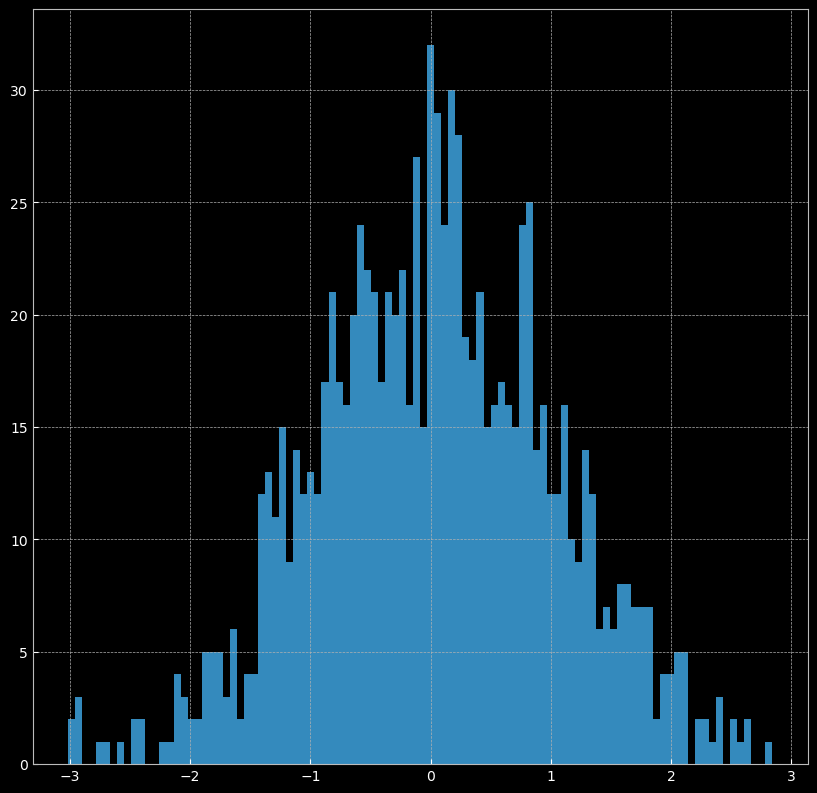

In [57]:
# En NumPy
plt.hist(torch.randn(1000).numpy(), 100);

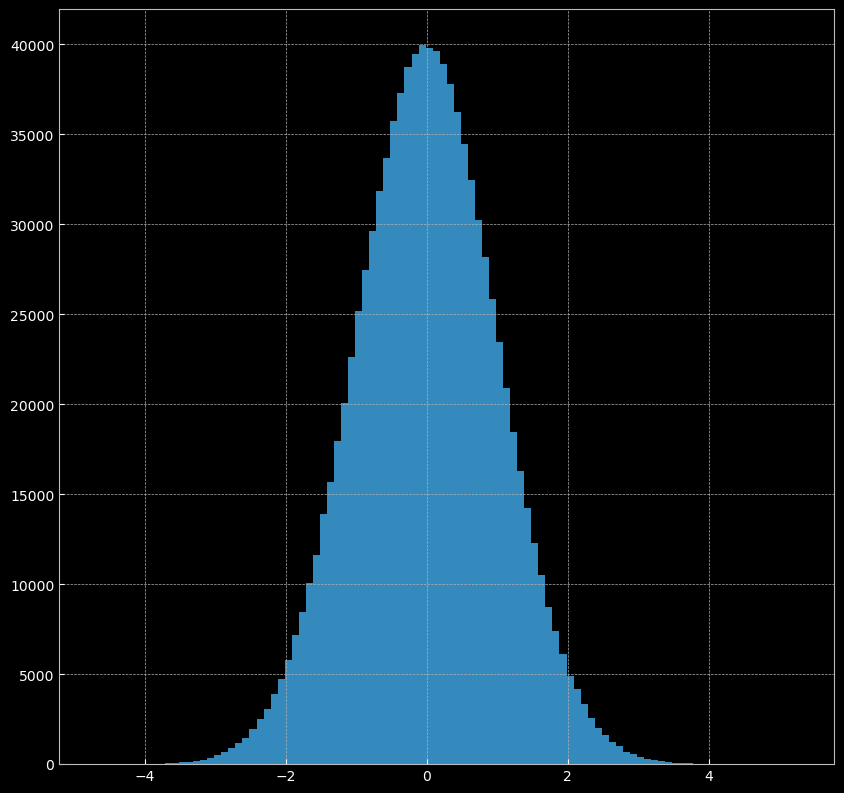

In [58]:
plt.hist(torch.randn(10**6).numpy(), 100);   # combien pèse ce graphique ?
# utiliser rasterized=True pour SVG/EPS/PDF!

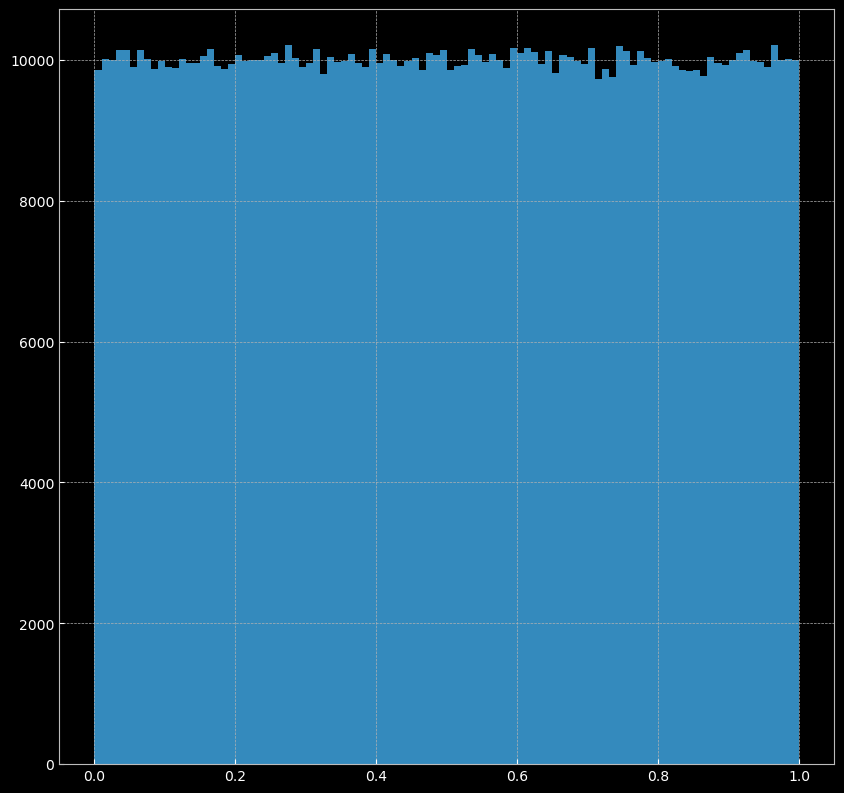

In [59]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [ ]:
# Aide pour obtenir le type de tenseur
torch.*Tensor?

In [60]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [61]:
# Il s'agit essentiellement d'un tenseur de flotteur de 64 bits
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [62]:
# Cela crée un tenseur de type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [63]:
# Déplace votre tenseur sur le GPU 0 s'il y en a un (premier GPU dans le système)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [64]:
# Convertit le tenseur en tableau numpy
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [65]:
# Remplissage de la colonne 0 et de la ligne 0 avec la valeur -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [66]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [67]:
# Pour céer un tenseur d'entiers allant de 0 à 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4], dtype=torch.int32)


In [68]:
# Multiplication de tous les éléments par 2 pour le tenseur n
# Parce que n est essentiel n_np, pas un clone, cela affecte n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## Plus de fun

In [69]:
# Pour créer deux tenseurs de taille 1x4
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a.size(), b)

torch.Size([1, 4]) tensor([[5., 6., 7., 8.]])


In [70]:
# Pour concaténer sur l'axe 0, donc vous obtenez 2x4
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [71]:
# Pour concaténer sur l'axe 1, donc vous obtenez 1x8
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

## Plus encore

Il y a certainement beaucoup plus à voir, mais c'est l'essentiel pour les `Tensor`.

L'API complète de *Torch* doit être lue au moins une fois.
Pour cela, allez [ici](https://pytorch.org/docs/stable/index.html).
Vous y trouverez plus de 100 opérations `Tensor`, y compris la transposition, l'indexation, le découpage, les opérations mathématiques, l'algèbre linéaire, les nombres aléatoires, etc.